# Summary

In [1]:
import pandas as pd
import os
import pathlib


current_path = os.getcwd()
DATASETS_DIR = pathlib.Path(current_path)
DATASET_FILES = [
    "linear_regression/linear_regression_basic_results.csv",
    "linear_regression/linear_regression_expanded_results.csv",
    "linear_regression/linear_regression_full_results.csv",
]
DATASET_PATHS = [f"{DATASETS_DIR}/{file}" for file in DATASET_FILES]
results_linear_regression = [
    pd.read_csv(result, index_col=0) for result in DATASET_PATHS
]
results_linear_regression = pd.concat(
    results_linear_regression, join="outer", axis=0
).reset_index(drop=True)

results_linear_regression.insert(0, "Model type", "Linear regression")

In [2]:
import pandas as pd
import os
import pathlib


current_path = os.getcwd()
DATASETS_DIR = pathlib.Path(current_path)
DATASET_FILES = [
    "random_forest/random_forest_basic_results.csv",
    "random_forest/random_forest_expanded_results.csv",
    "random_forest/random_forest_full_results.csv",
]
DATASET_PATHS = [f"{DATASETS_DIR}/{file}" for file in DATASET_FILES]
results_random_forest = [pd.read_csv(result, index_col=0) for result in DATASET_PATHS]
results_random_forest = pd.concat(
    results_random_forest, join="outer", axis=0
).reset_index(drop=True)

results_random_forest.insert(0, "Model type", "Random forest")

In [3]:
import pandas as pd
import os
import pathlib


current_path = os.getcwd()
DATASETS_DIR = pathlib.Path(current_path)
DATASET_FILES = [
    "lightgbm/lightgbm_basic_results.csv",
    "lightgbm/lightgbm_expanded_results.csv",
    "lightgbm/lightgbm_full_results.csv",
]
DATASET_PATHS = [f"{DATASETS_DIR}/{file}" for file in DATASET_FILES]
results_lightgbm = [pd.read_csv(result, index_col=0) for result in DATASET_PATHS]
results_lightgbm = pd.concat(results_lightgbm, join="outer", axis=0).reset_index(
    drop=True
)

results_lightgbm.insert(0, "Model type", "LightGBM")

In [4]:
results = pd.concat(
    [results_linear_regression, results_random_forest, results_lightgbm], axis=0
).reset_index(drop=True)

## All tested models results

In [5]:
results

,Model type,Split type,Tuning type,Set of features,RMSE,MAE
0,Linear regression,chronological,default,basic,0.947648,0.673958
1,Linear regression,random,default,basic,0.824599,0.538489
2,Linear regression,chronological,Ridge,basic,0.956457,0.677980
3,Linear regression,chronological,Lasso,basic,0.953894,0.677665
4,Linear regression,random,Ridge,basic,0.825067,0.538193
5,Linear regression,random,Lasso,basic,0.823513,0.535896
6,Linear regression,chronological,default,expanded,0.594538,0.438196
7,Linear regression,random,default,expanded,0.570687,0.382039
8,Linear regression,chronological,Ridge,expanded,0.601106,0.441633
9,Linear regression,chronological,Lasso,expanded,0.595102,0.435859


In [6]:
results_to_save = results.copy()
results_to_save["RMSE"] = results_to_save["RMSE"].round(6)
results_to_save["MAE"] = results_to_save["MAE"].round(6)

results_to_save.to_csv("./all_models_results.csv", index=False)

In [7]:
results = results[
    results["Tuning type"].isin(["default", "Ridge", "minimise_overfitting", "Optuna"])
].reset_index(drop=True)
results["Tuning type"] = results["Tuning type"].replace(
    ["Ridge", "minimise_overfitting", "Optuna"], "tuned"
)

In [8]:
import sys

import os
import pathlib

sys.path.append("../..")
from training.results import plot_summary_all_models

## MAE

### Random split

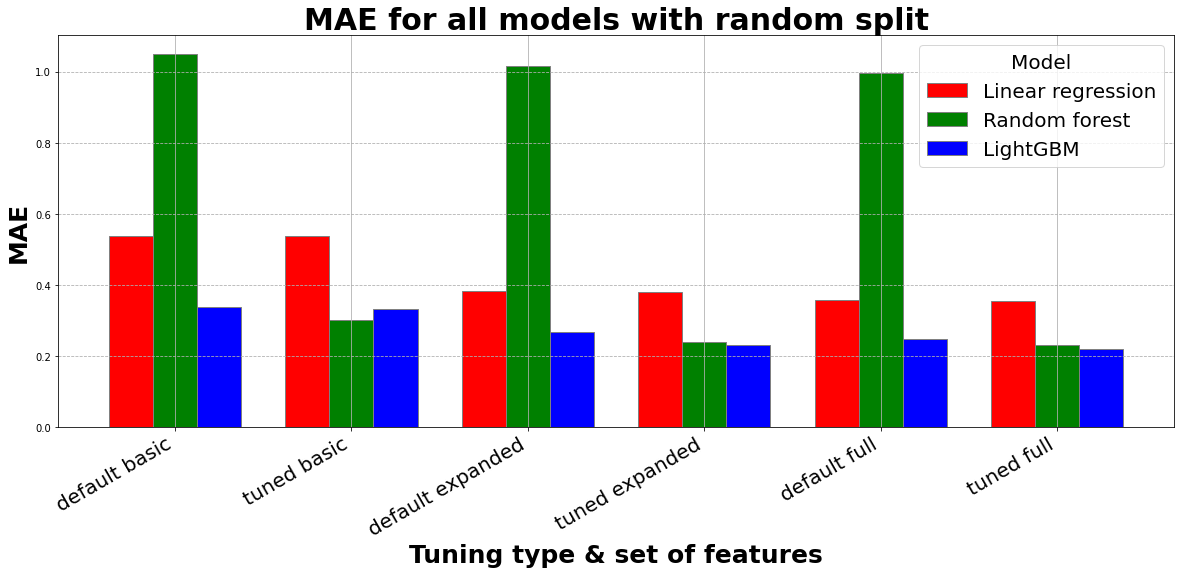

In [9]:
plot_summary_all_models(
    results, "random", "MAE", title="MAE for all models with random split"
)

#### Not tuned

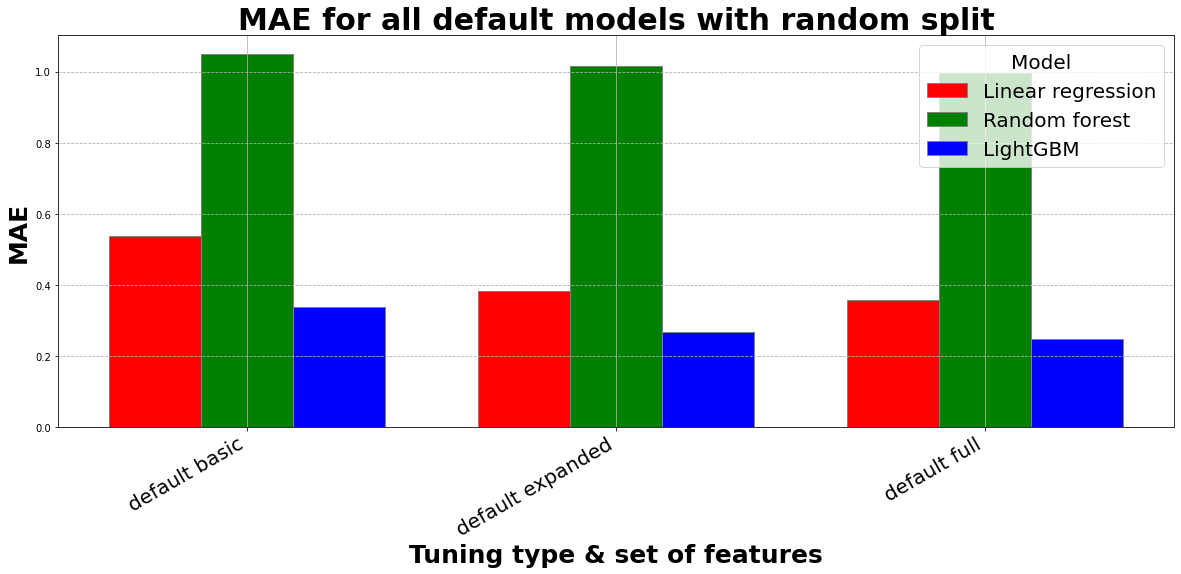

In [10]:
plot_summary_all_models(
    results[results["Tuning type"] == "default"],
    "random",
    "MAE",
    title="MAE for all default models with random split",
)

#### Tuned

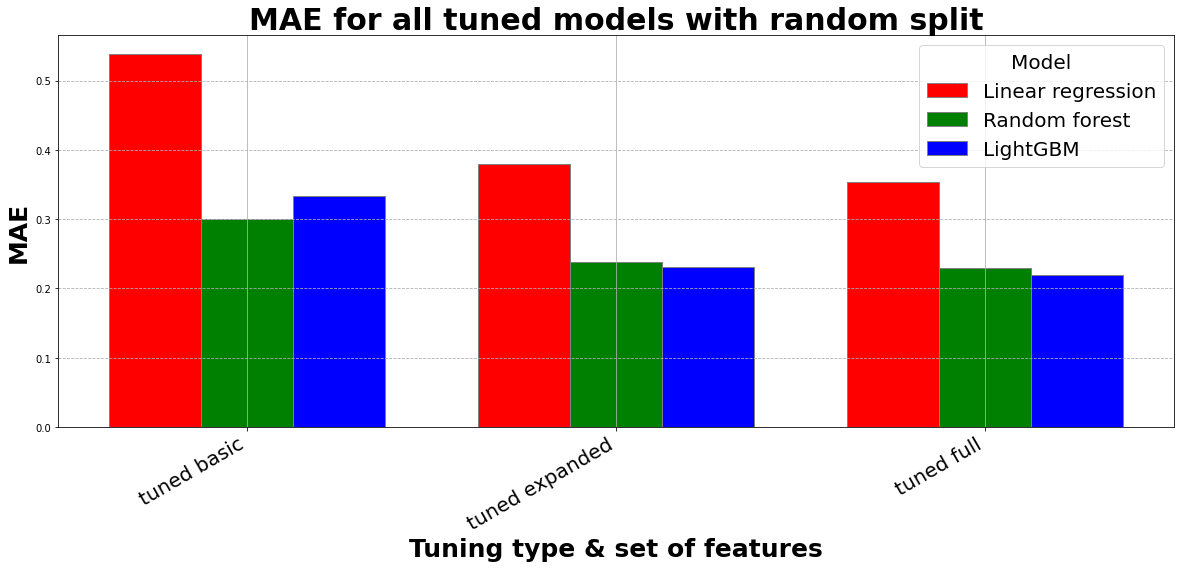

In [11]:
plot_summary_all_models(
    results[results["Tuning type"] == "tuned"],
    "random",
    "MAE",
    title="MAE for all tuned models with random split",
)

### Chronological split

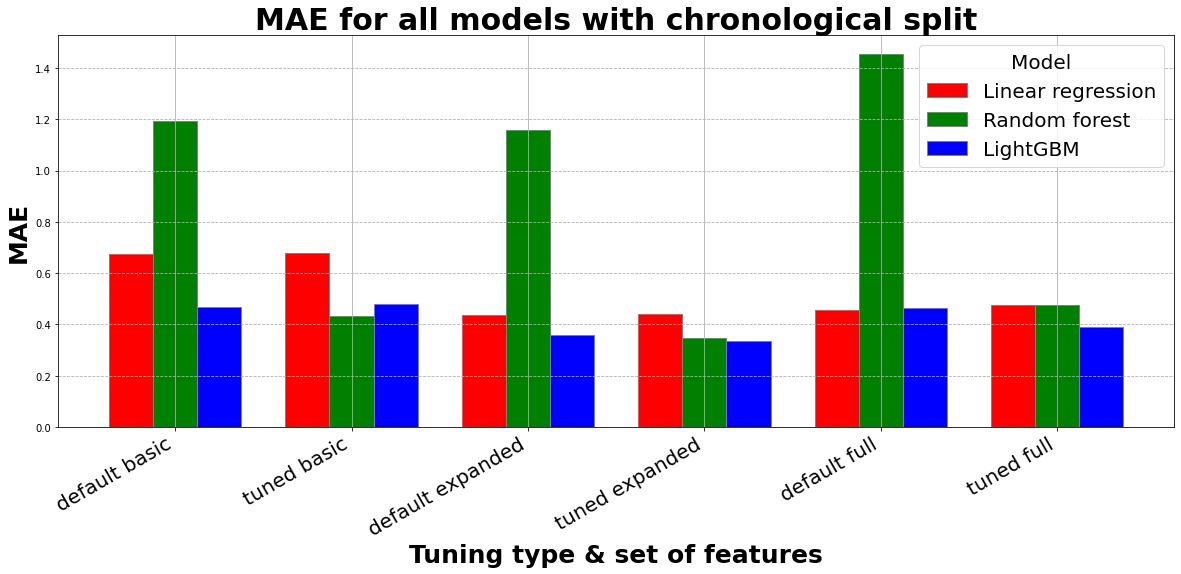

In [12]:
plot_summary_all_models(
    results, "chronological", "MAE", title="MAE for all models with chronological split"
)

#### Not tuned

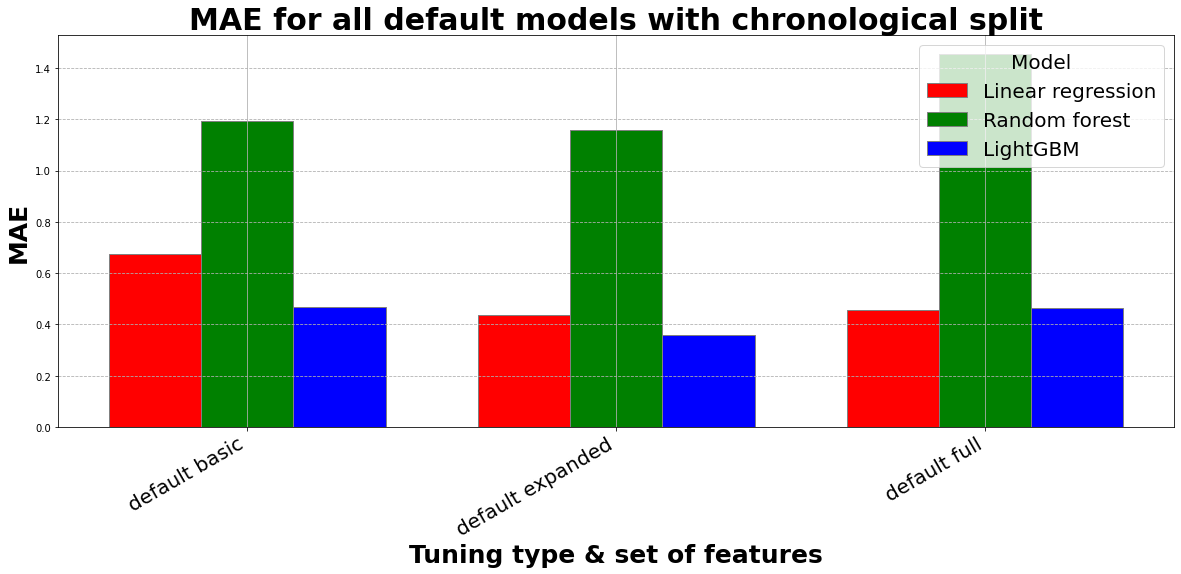

In [13]:
plot_summary_all_models(
    results[results["Tuning type"] == "default"],
    "chronological",
    "MAE",
    title="MAE for all default models with chronological split",
)

#### Tuned

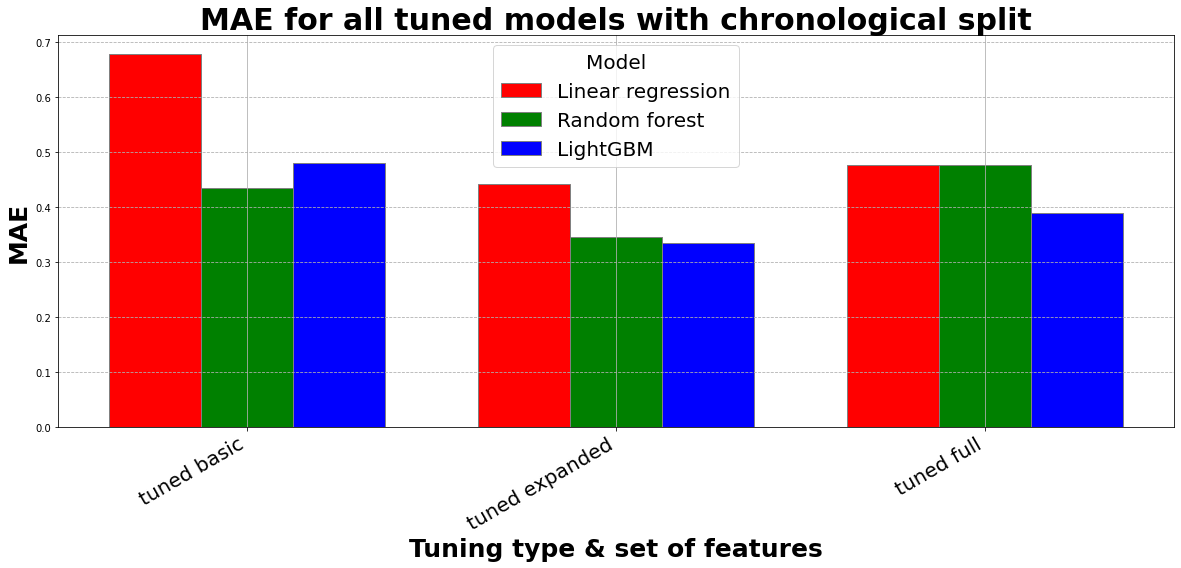

In [14]:
plot_summary_all_models(
    results[results["Tuning type"] == "tuned"],
    "chronological",
    "MAE",
    title="MAE for all tuned models with chronological split",
)

## RMSE

### Random split

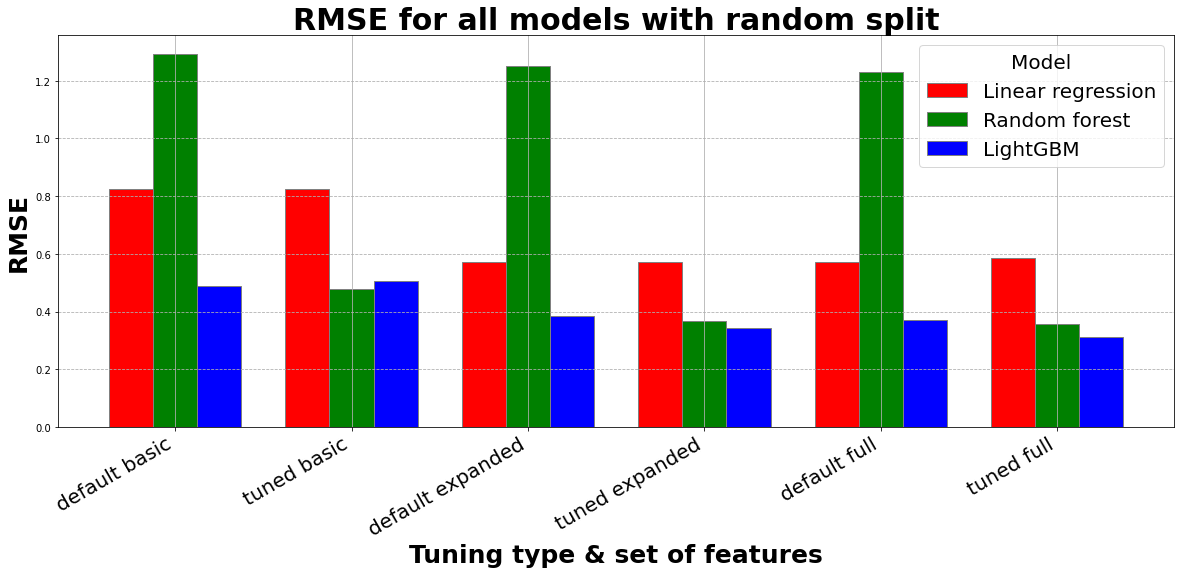

In [15]:
plot_summary_all_models(
    results, "random", "RMSE", title="RMSE for all models with random split"
)

#### Not tuned

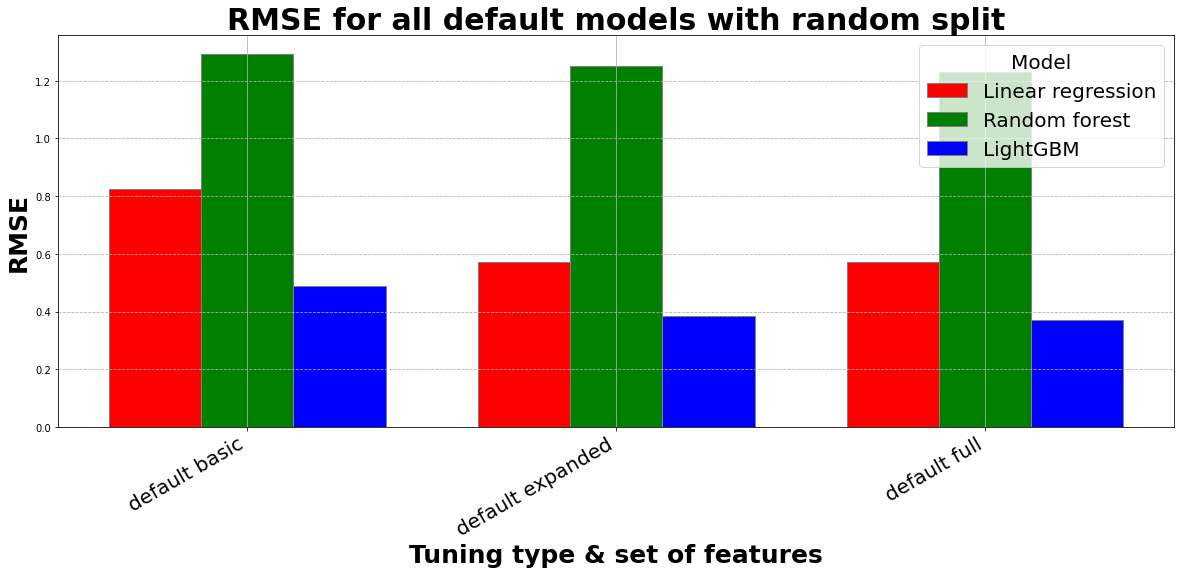

In [16]:
plot_summary_all_models(
    results[results["Tuning type"] == "default"],
    "random",
    "RMSE",
    title="RMSE for all default models with random split",
)

#### Tuned

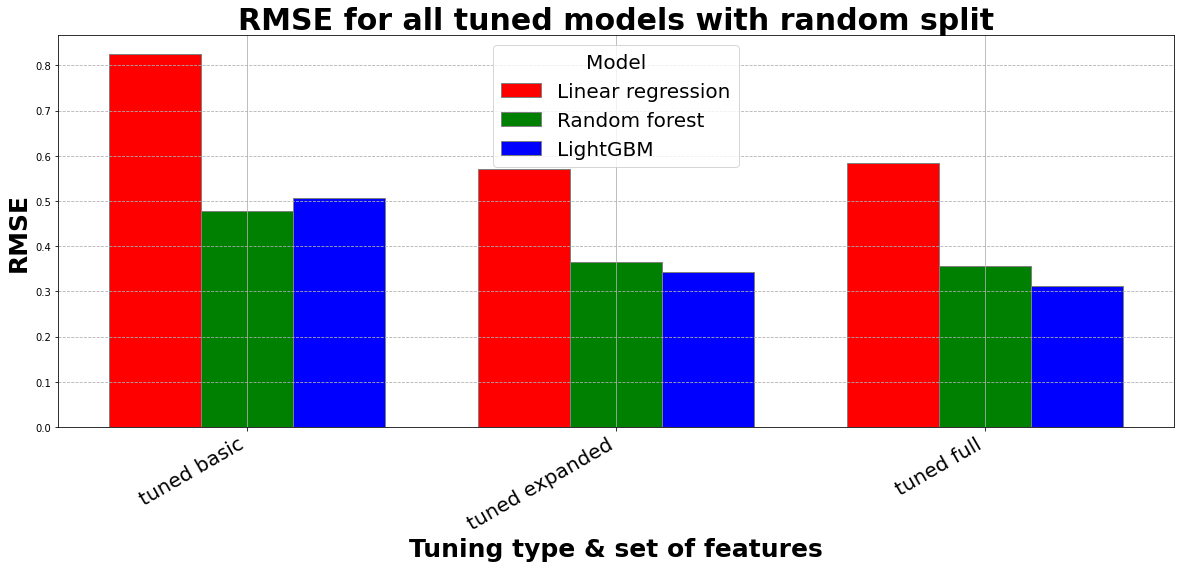

In [17]:
plot_summary_all_models(
    results[results["Tuning type"] == "tuned"],
    "random",
    "RMSE",
    title="RMSE for all tuned models with random split",
)

### Chronological split

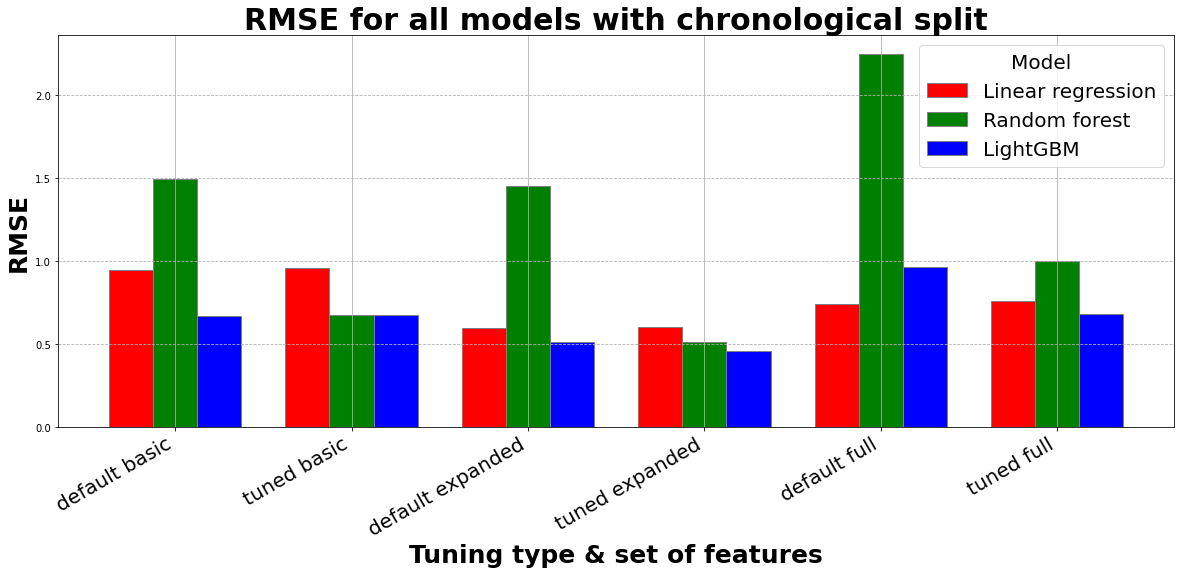

In [18]:
plot_summary_all_models(
    results,
    "chronological",
    "RMSE",
    title="RMSE for all models with chronological split",
)

#### Not tuned

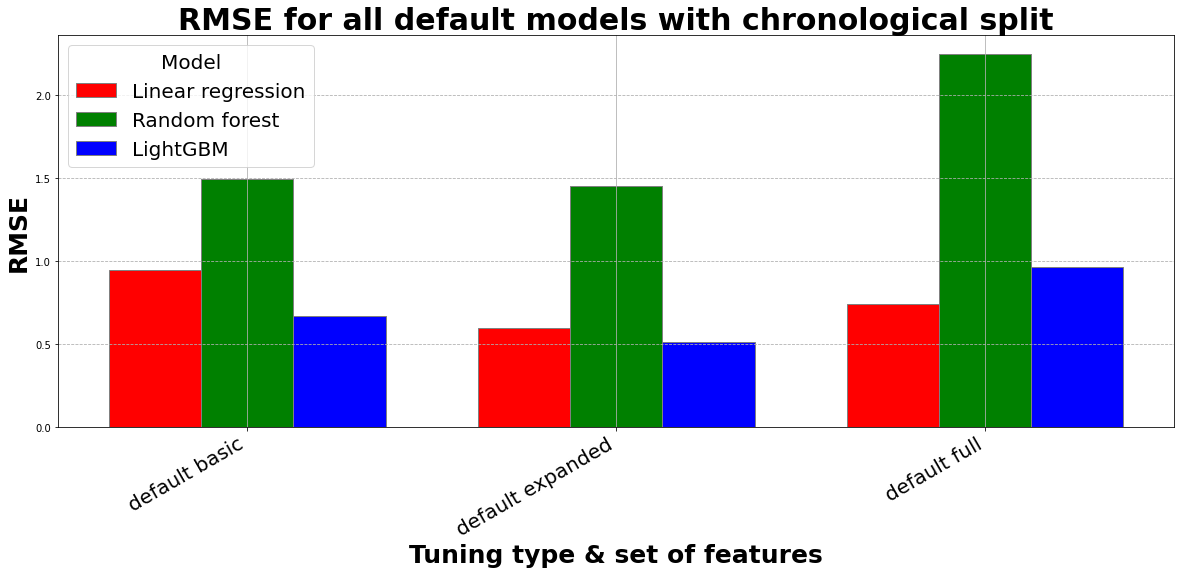

In [19]:
plot_summary_all_models(
    results[results["Tuning type"] == "default"],
    "chronological",
    "RMSE",
    title="RMSE for all default models with chronological split",
)

#### Tuned

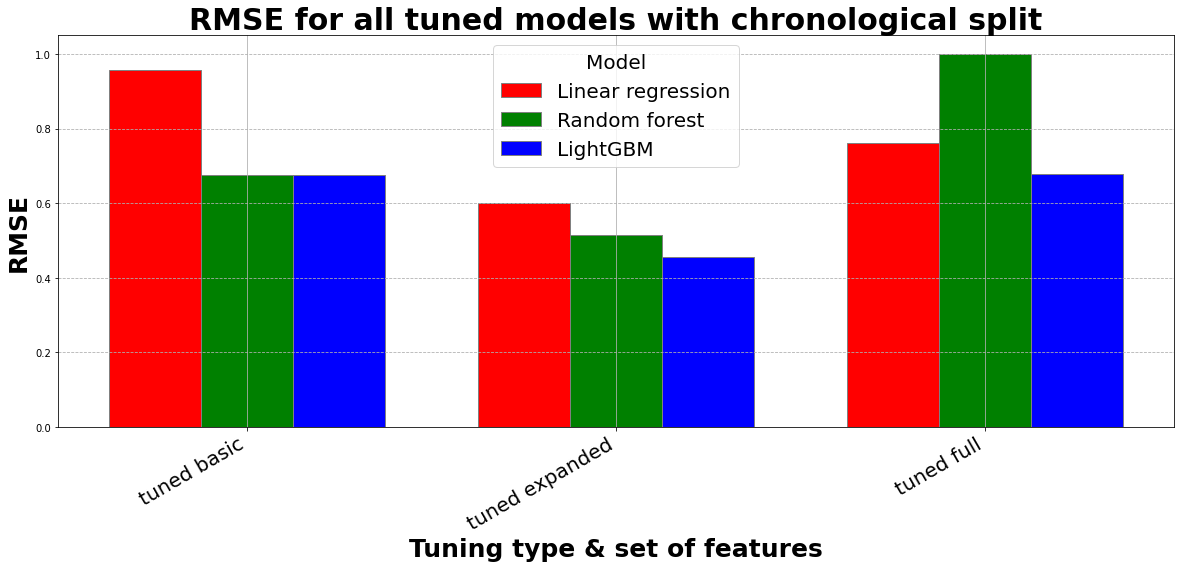

In [20]:
plot_summary_all_models(
    results[results["Tuning type"] == "tuned"],
    "chronological",
    "RMSE",
    title="RMSE for all tuned models with chronological split",
)